<a href="https://colab.research.google.com/github/LuisPerdomo123/Inteligencia-Computacional/blob/main/Classification_MLP_Caso_Practico_I.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introducción a Keras: Implementando una RNA para clasificación

## Pasos en la implementación de una Red Neuronal Artificial en Keras



1.   Define tu conunto de datos de entrenamiento: vectores de entrada y de salida
2.   Define la arquitectura de la Red Neuronal Artificial
3. Configura el proceso de apredizaje mediante la selección de una función de error, una función de optimización y diferentes metricas para monitorizar el proceso.
4. Entrena la RNA con tu conjunto de datos de entrenamiento mediante el uso de método **fit()**



## 0. Imports
Lo primero que debe hacerse es importar las librerías específicas necesarias para la implementación de la Red Neuronal Artificial. En las nuevas verisones de TensorFlow y Keras, la recomendación es utilizar a través del framework TensorFlow.

In [ ]:
import tensorflow as tf
tf.__version__

'2.15.0'

In [ ]:
from tensorflow import keras

## 1. Definición del conjunto de datos de entrenamiento

### 1.1. Importando el conjunto de datos
Keras nos proporciona algunos conjuntos de datos de prueba que podemos utilizar para la realización de pruebas.

In [ ]:
from tensorflow.keras import datasets

Podemos utilizar tab sobre "datasets" para visualizar los conjuntos de datos disponibles. En este caso vaos a imoportar el conjunto de datos MNIST.

In [ ]:
mnist = datasets.mnist

Podemos utilizar hsift + tab sobre "load_data()" para visualizar el input y putput del método.

In [21]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


El conjunto de datos importado esta formado por un total de 70000 imágenes divididas en dos conjuntos de datos, el conjunto de datos de entrenamiento A_train (60000 imágenes) y el conjunto de datos de pruebas (10000 imágenes).

In [22]:
X_train.shape

(60000, 28, 28)

In [23]:
X_test.shape

(10000, 28, 28)

Las etiquetas se corresponden con el valor numélrico que representa la imágen.

In [25]:
y_train.shape

(60000,)

In [26]:
y_train[0]

5

### 1.2. Visualizando el conjunto de datos

In [27]:
import numpy as np
import matplotlib.pyplot as plt

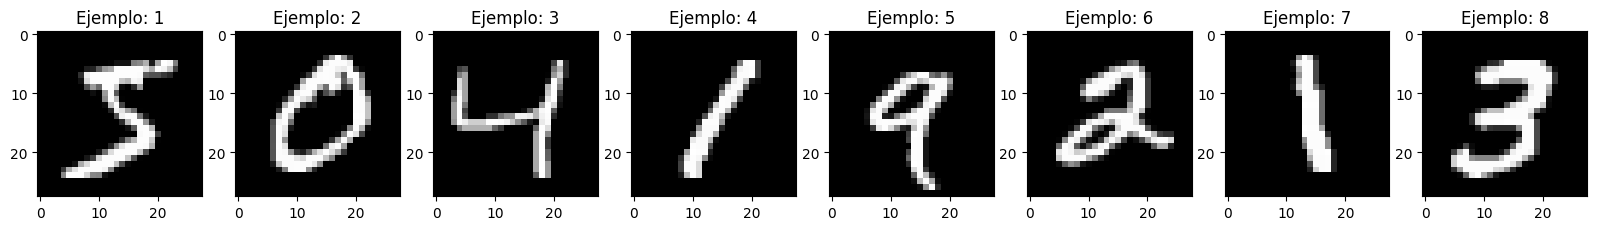

In [31]:
# Visualización de los primeros 8 ejemplos de nuestro conunto de datos de entrenamiento
plt.figure(figsize=(20, 4))

for index, digit in zip(range(1, 9), X_train[:8]):
  plt.subplot(1, 8, index)
  plt.imshow(np.reshape(digit, (28,28)), cmap=plt.cm.gray)
  plt.title('Ejemplo: '+str(index))
plt.show()

### 1.3. División del conjunto de datos

Para la realización de una serie de pruebas adicionales vamos a dividir el conjunto de datos de prueba en dos subconjuntos, el conjunto de validación (X_val) y el conjunto de pruebas (X_test)

In [32]:
from sklearn.model_selection import train_test_split

X_test, X_val, y_test, y_vla = train_test_split(X_test, y_test, test_size=0.5)

In [33]:
X_test.shape

(5000, 28, 28)

In [35]:
X_val.shape

(5000, 28, 28)

## 2. Definición de la arquitectura de la Red Neuronal Artificial

Tal y como puede observar en la definición de la Red Neuronal Artifivial que se muestra a continuación, el bloque básico que utiliza Keras es un **layer** o capa. La red Neuronal estará formada por diferentes capas que a su vez contendrán un conjunto de neuronas que se corresponden con el primer parámetro que se proporciona.

In [36]:
from tensorflow.keras import models
from tensorflow.keras import layers

Definimos una Red Neuronal Artificial formada por 3 capas:

*   La primera capa estará formada por 300 neuronas
*   La segunda capa estará formada por 100 neuronas
*   La última capa estará formada por 10 neuronas





In [38]:
network = models.Sequential()

network.add(layers.Dense(300, activation='relu', input_shape=(28*28,)))
network.add(layers.Dense(100, activation='relu'))
network.add(layers.Dense(10, activation='softmax'))

Una vez hacemos la arquitectura de la Red Neuronal Artificial podemos visualizarla junto con el número total de parámetros utilizando el método summary().

Se tiene imágenes de 28*28=784 características de entrada a cada una de las neuronas de la primera hidden layer, sumado a una byas term por cada neurona. Por tanto, sería 28*28*300+300=235500

La segunda hidden layer compuesta por 100 neuronas tiene la entrada de 300 output de la primera hidden layer. Se suma un byas term como entrada a cada una de las neuronas. Por tanto, seria, 300*100+100=30100

La output layer conformado por 10 neuronas, tiene como entrada 100 neuronas de las segunda hidden layer. Sumado a un byas term. Por tanto sería, 10*100+10=1010

In [39]:
network.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (None, 300)               235500    
                                                                 
 dense_2 (Dense)             (None, 100)               30100     
                                                                 
 dense_3 (Dense)             (None, 10)                1010      
                                                                 
Total params: 266610 (1.02 MB)
Trainable params: 266610 (1.02 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


### 2.2. Acceso a los elementos definifos de la RNA

In [40]:
network.layers

En este caso vamos a acceder a los parámetros del modelo que componen las neuronas de la primera hidden layer.

In [41]:
hidden1 = network.layers[1]

In [43]:
weights, biases = hidden1.get_weights()

Como puede observase en las siguientes celdas, Keras automáticamente incializa el valor de los parámetros de manera aleatoria y los bías term con el valor 0

In [44]:
weights

array([[-0.10409719,  0.09699205, -0.07930139, ...,  0.02608173,
         0.11257466,  0.09591075],
       [-0.05035263, -0.07754628, -0.04387852, ..., -0.0816033 ,
         0.03240871,  0.10514119],
       [-0.10045862, -0.09931158,  0.04741732, ...,  0.0783732 ,
         0.11105558,  0.02513412],
       ...,
       [ 0.03670771,  0.01191846, -0.10764178, ...,  0.024145  ,
        -0.01135628,  0.04881192],
       [ 0.07630674,  0.1202699 , -0.01404929, ..., -0.04902805,
         0.02923211,  0.10349547],
       [-0.04799376,  0.07998564,  0.01793668, ..., -0.01223181,
         0.11577263,  0.01363509]], dtype=float32)

In [45]:
biases

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
      dtype=float32)

## 3. Configuración de la Red Neuronal Artificial
Para que la Red Neuronal Artificial funvione adecuadamente va a requerir tres componentes adicionales que se seleccionan durante el proceso de compilación:



1.   **La función de error:** Se utiliza en el proceso de optimización de los parámetros del modelo para medir el error producido al modificar el valor de los parámetros del modelo en una dirección determinada.
2.   **La función de optimización:** Se corresponde con la función encargada de actualizar el valor de los parámetros del modelo en una dirección determinada en función del resultado de la dunción de error.
3. **Metricas para monitorizar el proceso de entrenamiento:** Es interesante utilizar un conjunto de métricas durante el proceso de entrenamiento de la Red Neuronal Artificial de manera que podamos saber en cada iteración si el valor de los parámetros del modelo es adecuado o se están produciendo problemas como *overfitting*.



In [46]:
network.compile(loss='categorical_crossentropy',
                optimizer='sgd',
                metrics=['accuracy', 'Precision'])